In [4489]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from math import pi

In [4490]:
train = pd.read_csv('./data/train2.csv')
train.drop(['id','Unnamed: 0'],axis=1,inplace=True)
train.head()

,Gender,Lenght,Diameter,Height,Whole Weight,Shucked Weight,Viscra Weight,Shell Weight,Target
0,M,0.570,0.480,0.180,0.9395,0.3990,0.2000,0.2950,14
1,M,0.560,0.425,0.135,0.9415,0.5090,0.2015,0.1975,9
2,F,0.655,0.510,0.150,1.0430,0.4795,0.2230,0.3050,9
3,I,0.310,0.225,0.050,0.1445,0.0675,0.0385,0.0450,6
4,M,0.310,0.225,0.075,0.1295,0.0455,0.0335,0.0440,9


In [4491]:
test = pd.read_csv('./data/test2.csv')
test.drop(['id','Unnamed: 0'],axis=1,inplace=True)
test.head()

,Gender,Lenght,Diameter,Height,Whole Weight,Shucked Weight,Viscra Weight,Shell Weight,Target
0,F,0.435,0.350,0.125,0.4590,0.1970,0.1145,0.145,9
1,M,0.525,0.395,0.165,0.7820,0.2850,0.1405,0.285,19
2,M,0.465,0.360,0.080,0.4880,0.1910,0.1250,0.155,11
3,I,0.380,0.300,0.090,0.2770,0.1655,0.0625,0.082,6
4,M,0.510,0.390,0.125,0.6565,0.2620,0.1835,0.175,10


In [4492]:
##검증데이터 분할
# train, valid = train_test_split(train,test_size=len(test))
# print(len(train),len(valid),len(test))

c:\Users\KangIW\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\Users\KangIW\anaconda3\lib\site-packages\seaborn\distributions.py:2103: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)


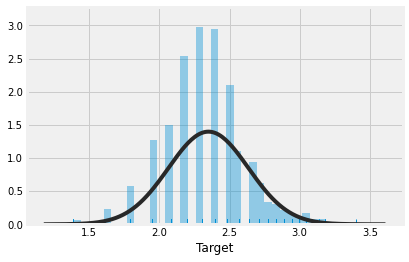

In [4493]:
#y정규분포 아님 -> 로그

import scipy as sp
t = np.log1p(train['Target'])
sns.distplot(t, rug=True, kde=False, fit=sp.stats.norm)
plt.show()


In [4494]:
# #전체무게 > 살 내장 껍질

# #train[train["Whole Weight"] < train['Shucked Weight']+train["Viscra Weight"]+train["Shell Weight"]]

# error_row = train[train["Whole Weight"] < train['Shucked Weight']+train["Viscra Weight"]+train["Shell Weight"]].index
# print("애러 데이터 행:", type(error_row),error_row)

# train.drop(error_row, axis = 0,inplace=True)

# len(train)

In [4495]:
train[train["Lenght"] < train['Diameter']]
r = train["Lenght"]/train['Diameter']
r

0       1.187500
1       1.317647
2       1.284314
3       1.377778
4       1.377778
          ...   
1122    1.255556
1123    1.277778
1124    1.333333
1125    1.296703
1126    1.318182
Length: 1127, dtype: float64

In [4496]:
train["Shucked Weight"].mean()/train["Viscra Weight"].mean()

1.9778682953306266

In [4497]:
train[train["Shucked Weight"] < train["Viscra Weight"]]


,Gender,Lenght,Diameter,Height,Whole Weight,Shucked Weight,Viscra Weight,Shell Weight,Target
1023,M,0.415,0.315,0.125,0.388,0.068,0.09,0.125,12


In [4498]:
#길이 < 직경
train[train["Lenght"] < train["Diameter"]]


,Gender,Lenght,Diameter,Height,Whole Weight,Shucked Weight,Viscra Weight,Shell Weight,Target


In [4499]:
## 애러열 제거
error_row = train[train["Shucked Weight"] < train["Viscra Weight"]].index
print("애러 데이터 행:", type(error_row),error_row)

train.drop(error_row, axis = 0,inplace=True)

len(train)

애러 데이터 행: <class 'pandas.core.indexes.numeric.Int64Index'> Int64Index([1023], dtype='int64')


1126

In [4500]:
##이상치 제거

def remove_outlier(train,column):
    outlier_num=0
    for i in range(3,24):
        df = train[train['Target']==i][column]    
        
        #1,3분위 수
        q25, q75 = np.percentile(df, [25,75])

        #Interquartile Range
        iqr = q75 - q25
        
        # (1분위수-IQR*1.5)~(3분위수+IQR*1.5)
        lowest = q25 - iqr * 1.5
        highest = q75 + iqr * 1.5
        outlier_index = df[(df < lowest) | (df > highest)].index
        train.drop(outlier_index, axis = 0, inplace = True)
        outlier_num += len(outlier_index)
        
    return outlier_num
        
    
outlier_sum = 0
columns = ['Lenght', 'Diameter', 'Height', 'Whole Weight','Shucked Weight', 'Viscra Weight','Shell Weight']
for col in columns:
    outlier_sum += remove_outlier(train,col)
print("이상치 개수: ",outlier_sum)
    
len(train)

이상치 개수:  73


1053

In [4501]:
## 이상치 제거- 전체 target 분포에 대해서

df = train['Target']  

#1,7분위 수
q1_, q7 = np.percentile(df, [12.5,87.5])

#Interquartile Range
iqr = q7 - q1_

# (1분위수-IQR*1.5)~(7분위수+IQR*1.5)
lowest = q1_ - iqr * 1.5
highest = q7 + iqr * 1.5
outlier_index_ = df[(df < lowest) | (df > highest)].index
train.drop(outlier_index_, axis = 0, inplace = True)

print("이상치 개수: ",len(outlier_index_))

이상치 개수:  4


In [4502]:
train.columns

Index(['Gender', 'Lenght', 'Diameter', 'Height', 'Whole Weight',
       'Shucked Weight', 'Viscra Weight', 'Shell Weight', 'Target'],
      dtype='object')

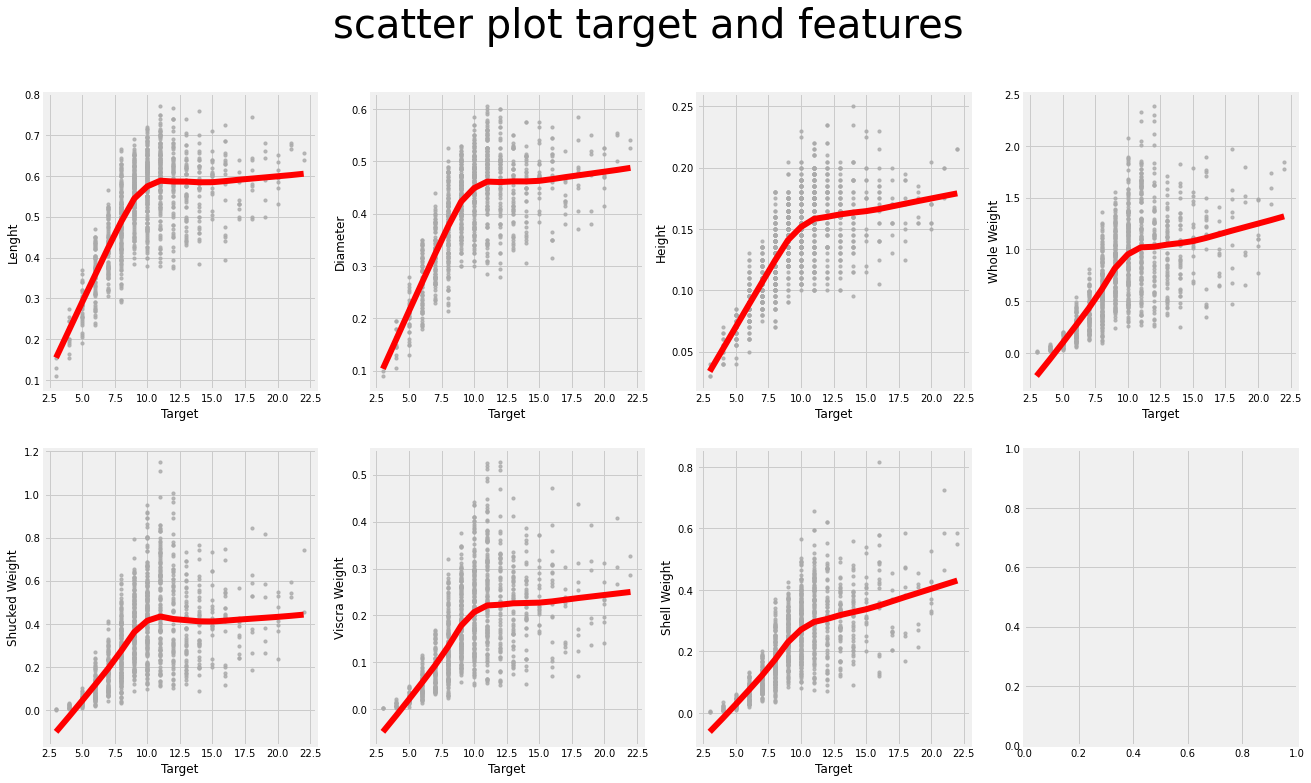

In [4503]:
def visualize(axx, yfield):
    sns.regplot(x='Target', y=yfield, data=train,lowess=True,color='#AAAAAA',scatter_kws={'s':10}, line_kws= {'color': 'red'},ax=axx) 

figure, ((ax1,ax2,ax3,ax4),(ax5,ax6,ax7,ax8)) = plt.subplots(nrows=2, ncols=4)
figure.set_size_inches(20,12)
figure.suptitle('scatter plot target and features', fontsize=40)
for i in range(len(train.columns[1:-1])):
  visualize(eval(f'ax{i+1}'), train.columns[i+1])

In [4504]:
#feature조합


train.insert(len(train.columns)-1,'ratio',round((train['Shucked Weight']/train["Whole Weight"]),4))
train.insert(len(train.columns)-1,'Density',round(train["Shucked Weight"]/((train["Lenght"]*train["Diameter"]/6*pi)),3))



test.insert(len(test.columns)-1,'ratio',round((test['Shucked Weight']/test["Whole Weight"]),4))
test.insert(len(test.columns)-1,'Density',round(test["Shucked Weight"]/((test["Lenght"]*test["Diameter"]/6*pi)),3))


train.head()

,Gender,Lenght,Diameter,Height,Whole Weight,Shucked Weight,Viscra Weight,Shell Weight,ratio,Density,Target
0,M,0.570,0.480,0.180,0.9395,0.3990,0.2000,0.2950,0.4247,2.785,14
1,M,0.560,0.425,0.135,0.9415,0.5090,0.2015,0.1975,0.5406,4.085,9
2,F,0.655,0.510,0.150,1.0430,0.4795,0.2230,0.3050,0.4597,2.741,9
3,I,0.310,0.225,0.050,0.1445,0.0675,0.0385,0.0450,0.4671,1.848,6
5,F,0.565,0.400,0.130,0.6975,0.3075,0.1665,0.1800,0.4409,2.599,8


In [4505]:
#feature 삭제

train.drop('Whole Weight',axis=1,inplace=True)
test.drop('Whole Weight',axis=1,inplace=True)

train.drop('Lenght',axis=1,inplace=True)
test.drop('Lenght',axis=1,inplace=True)

# train.drop('Diameter',axis=1,inplace=True)
# test.drop('Diameter',axis=1,inplace=True)

# train.drop('Lenght',axis=1,inplace=True)
# test.drop('Lenght',axis=1,inplace=True)
train.head()

,Gender,Diameter,Height,Shucked Weight,Viscra Weight,Shell Weight,ratio,Density,Target
0,M,0.480,0.180,0.3990,0.2000,0.2950,0.4247,2.785,14
1,M,0.425,0.135,0.5090,0.2015,0.1975,0.5406,4.085,9
2,F,0.510,0.150,0.4795,0.2230,0.3050,0.4597,2.741,9
3,I,0.225,0.050,0.0675,0.0385,0.0450,0.4671,1.848,6
5,F,0.400,0.130,0.3075,0.1665,0.1800,0.4409,2.599,8


In [4506]:
# data_description = train.describe()

# # 수치형 데이터 통계치 그래프
# interest_coloumns = train.columns[1:]
# plt.style.use('fivethirtyeight')
# fig, ax =plt.subplots(2, 5, figsize = (25, 10))
# fig.suptitle('Histogram of interesting features', fontsize=40)
# column_idx = 0
# for i in range(2):
#     for j in range(5):
#         ax[i][j].hist(train[interest_coloumns[column_idx]], bins=30, color='#eaa18a', edgecolor='#7bcabf')
#         ax[i][j].set_title(interest_coloumns[column_idx])
#         ax[i][j].axvline(data_description[interest_coloumns[column_idx]]['mean'], c='#f55354', label = f"mean = {round(data_description[interest_coloumns[column_idx]]['mean'], 2)}")
#         ax[i][j].axvline(data_description[interest_coloumns[column_idx]]['50%'], c='#518d7d', label = f"median = {round(data_description[interest_coloumns[column_idx]]['50%'], 2)}")
#         ax[i][j].legend()
#         column_idx += 1


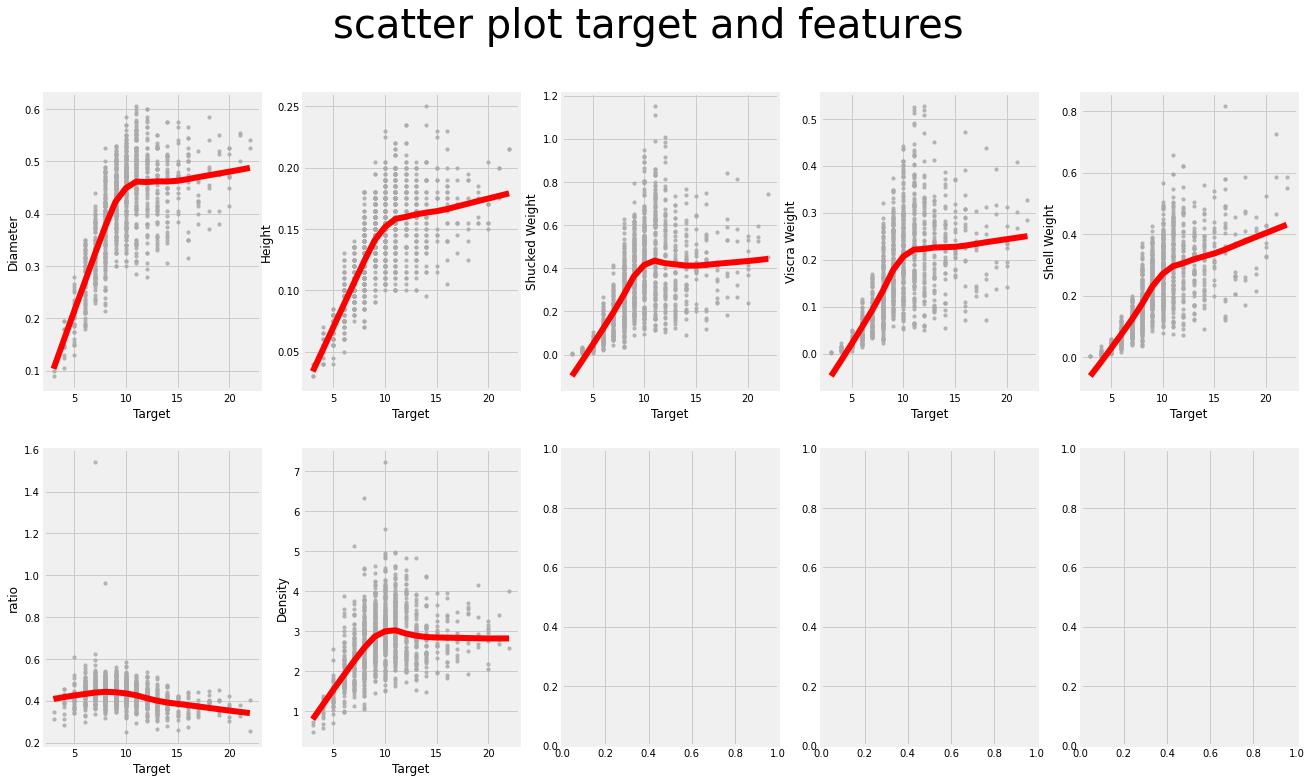

In [4507]:
def visualize(axx, yfield):
    sns.regplot(x='Target', y=yfield, data=train,lowess=True,color='#AAAAAA',scatter_kws={'s':10}, line_kws= {'color': 'red'},ax=axx) 

figure, ((ax1,ax2,ax3,ax4,ax5),(ax6,ax7,ax8,ax9,ax10)) = plt.subplots(nrows=2, ncols=5)
figure.set_size_inches(20,12)
figure.suptitle('scatter plot target and features', fontsize=40)
for i in range(len(train.columns[1:-1])):
  visualize(eval(f'ax{i+1}'), train.columns[i+1])

Text(0.5, 1.0, 'Correlation between features')

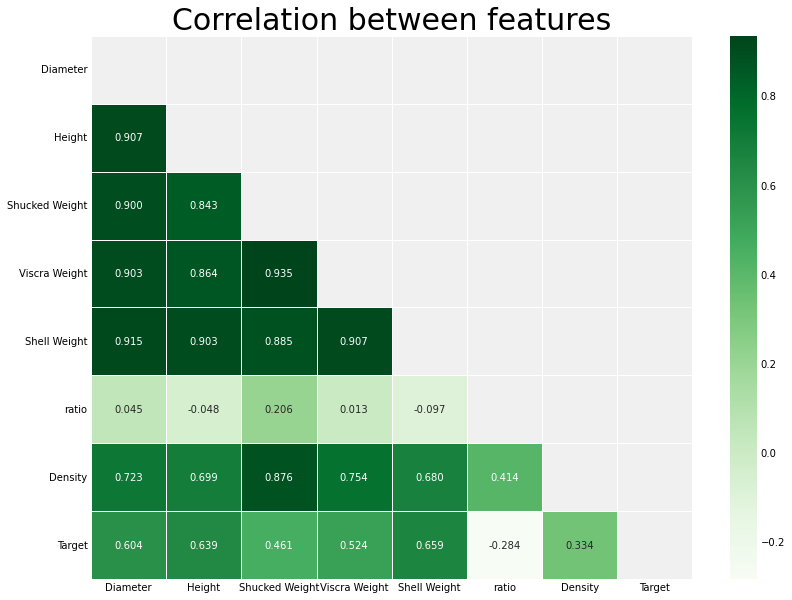

In [4508]:
# 수치형 데이터 상관관계 히트맵
train_corr = train.drop(columns=['Gender'],axis=1)
scaler= MinMaxScaler() 
train_corr[train_corr.columns] = scaler.fit_transform(train_corr[train_corr.columns])
corr28 = train_corr.corr(method= 'pearson')

mask = np.zeros_like(corr28)
mask[np.triu_indices_from(mask)] = True

plt.figure(figsize=(12,10))
sns.heatmap(data = corr28, annot=True, mask=mask, fmt = '.3f', linewidths=.5, cmap='Greens')
plt.title('Correlation between features', fontsize=30)

In [4509]:

#라벨인코딩을 하기 위함 dictionary map 생성 함수
def make_label_map(dataframe):
    label_maps = {}
    for col in dataframe.columns:
        if dataframe[col].dtype=='object':
            label_map = {'unknown':0}
            for i, key in enumerate(dataframe[col].unique()):
                label_map[key] = i+1  #새로 등장하는 유니크 값들에 대해 1부터 1씩 증가시켜 키값을 부여해줍니다.
            label_maps[col] = label_map
    print(label_maps)
    return label_maps

# 각 범주형 변수에 인코딩 값을 부여하는 함수
def label_encoder(dataframe, label_map):
    for col in dataframe.columns:
        if dataframe[col].dtype=='object':
            dataframe[col] = dataframe[col].map(label_map[col])
            dataframe[col] = dataframe[col].fillna(label_map[col]['unknown']) #혹시 모를 결측값은 unknown의 값(0)으로 채워줍니다.
    return dataframe

In [4510]:
#라벨 인코딩
pd.set_option('mode.chained_assignment',  None)#경고무시

train_le = make_label_map(train[['Gender']])
gender_df = label_encoder(train[['Gender']], train_le)
train['Gender'] = gender_df[['Gender']]

gender_df = label_encoder(test[['Gender']], train_le)
test['Gender'] = gender_df[['Gender']]

# 단, 학습 데이터에 학습된 인코더를 사용해 주어야 합니다.
# (테스트 데이터를 학습 시킨 인코더를 사용하면 data leakage 에 해당됩니다!)




{'Gender': {'unknown': 0, 'M': 1, 'F': 2, 'I': 3}}


In [4511]:
X_train = train.drop('Target',axis=1)
Y_train = train['Target']

X_test = test.drop('Target',axis=1)
Y_test = test['Target']

In [4512]:
from sklearn.linear_model import LinearRegression,PoissonRegressor, Ridge
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
import lightgbm as ltb
import xgboost as xgb
xgboost = xgb.XGBRegressor(objective ='reg:linear', verbosity = 0, random_state=42)

from sklearn.model_selection import cross_val_score 


def kfoldVal(model):
    scores = cross_val_score(model,X_train,Y_train,scoring='neg_mean_absolute_error',cv=5)
    return scores,scores.mean()

    
model1 = LinearRegression()
print('{:<12}'.format("Linear"),kfoldVal(model1))

model2 = RandomForestRegressor()
print('{:<12}'.format("RandomForest"),kfoldVal(model2))
type(model2)

model3 = PoissonRegressor()
print('{:<12}'.format("Poisson"),kfoldVal(model3))

model4 = ltb.LGBMRegressor()
print('{:<12}'.format("LGB"),kfoldVal(model4))

model5 = xgb.XGBRegressor()
print('{:<12}'.format("XGB"),kfoldVal(model5))

model6 = Ridge()
print('{:<12}'.format("Ridge"),kfoldVal(model6))

model7 = GradientBoostingRegressor()
print('{:<12}'.format("Gradient"),kfoldVal(model7))



Linear       (array([-1.53220991, -1.45773982, -1.33260873, -1.59099496, -1.4652885 ]), -1.4757683862475488)
RandomForest (array([-1.45842857, -1.43057143, -1.37947619, -1.52866667, -1.46913876]), -1.4532563226247437)
Poisson      (array([-2.04441796, -1.96851117, -1.81430423, -2.0579825 , -1.88042705]), -1.9531285817167021)
LGB          (array([-1.51094002, -1.64145633, -1.48280289, -1.65288595, -1.59108857]), -1.5758347505159218)
XGB          (array([-1.63265111, -1.63150892, -1.3904079 , -1.7043432 , -1.59787692]), -1.5913576095558892)
Ridge        (array([-1.55226058, -1.56169878, -1.35685813, -1.63216702, -1.44927139]), -1.5104511794362954)
Gradient     (array([-1.46615265, -1.41754278, -1.28493886, -1.59032762, -1.47857065]), -1.4475065121722777)


In [4513]:
# prediction1 = model1.predict(X_test)
# prediction2 = model2.predict(X_test)
# prediction3 = model3.predict(X_test)
# prediction4 = model4.predict(X_test)
# prediction5 = model5.predict(X_test)
# prediction6 = model6.predict(X_test)

In [4524]:
#하이퍼파라미터튜딩 & k-fold검증: GridSearch
from sklearn.model_selection import GridSearchCV


randomforest_parameters = {
    "n_estimators" : [50,75,100],
    'max_depth' : [5,6,7,8,9],
    "min_samples_split": [2,3,4,5],    
    'min_samples_leaf':[7,8,9]
}
# 그리드 초기화 
grid = GridSearchCV(RandomForestRegressor(),param_grid = randomforest_parameters,scoring='neg_mean_absolute_error',verbose=1, cv=5)

#최적 파라미터 찾아 피팅
grid.fit(X_train,Y_train)
print("최적 파라미터:",grid.best_params_)


Fitting 5 folds for each of 180 candidates, totalling 900 fits
최적 파라미터: {'max_depth': 6, 'min_samples_leaf': 9, 'min_samples_split': 5, 'n_estimators': 75}


In [4515]:
def NMAE(true, pred):
    mae = np.mean(np.abs(true-pred))        #전차의 절댓값의 평균
    score = mae / np.mean(np.abs(true))     #정답의 평균으로 나눠서 정규화
    return score

model_final = RandomForestRegressor(max_depth= 5, min_samples_leaf =9, min_samples_split=2, n_estimators=100,random_state=1)
model_final.fit(X_train,Y_train)

prediction = model_final.predict(X_test)
print('RandomForestRegression',NMAE(Y_test,prediction))

RandomForestRegression 0.145738990176508


In [4516]:
# import pickle
# with open("2018037003_강인우1.model",'wb') as fw:
#     pickle.dump(randomforest_grid, fw)

In [4517]:
# min s s: 3 ->
# 0.14434818891648418
0.14434818891648418

0.14434818891648418

In [4518]:
#min sample leaf
#0.14434818891648418

In [4519]:
# #from sklearn.metrics import mean_absolute_error

# def NMAE(true, pred):
#     mae = np.mean(np.abs(true-pred))        #전차의 절댓값의 평균
#     score = mae / np.mean(np.abs(true))     #정답의 평균으로 나눠서 정규화
#     return score

# print('LinearRegression',NMAE(Y_test,prediction1))
# print('RandomForestRegressor',NMAE(Y_test,prediction2))
# print('PoissonRegressor',NMAE(Y_test,prediction3))
# print('LGBMRegressor',NMAE(Y_test,prediction4))
# print('XGBRegressor',NMAE(Y_test,prediction5))
# print('Ridge',NMAE(Y_test,prediction6))

In [4520]:
# 내장/전체 => 전체-내장 3.45 -> water 제거
# LinearRegression 0.1529504987178766
# RandomForestRegressor 0.14782889426957233
# PoissonRegressor 0.16611219653900597
# LGBMRegressor 0.1570520752931757
# XGBRegressor 0.15335985900318555

# LinearRegression 0.16268475428731646
# RandomForestRegressor 0.14503631961259073
# PoissonRegressor 0.18011110570260375
# LGBMRegressor 0.15553700031872256
# XGBRegressor 0.16985757818522232

#비슷한데 2번째게 좀더 좋은 느낌
# LinearRegression 0.1626847542873165
# RandomForestRegressor 0.14617433414043582
# PoissonRegressor 0.18135950112460916
# LGBMRegressor 0.15744407669518717
# XGBRegressor 0.16775030970477212


In [4521]:
#부피 추가 - 밀도랑 같이 쓰면 낮아짐
# LinearRegression 0.16268475428731655
# RandomForestRegressor 0.14551251008878124
# PoissonRegressor 0.18011110570275507
# LGBMRegressor 0.15553700031872256
# XGBRegressor 0.16985757818522232b

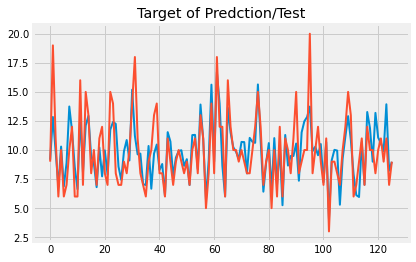

<Figure size 2160x1440 with 0 Axes>

In [4522]:
plt.title("Target of Predction/Test")
plt.plot(prediction, label="predict",linewidth=2)
plt.plot(Y_test, label="real age",linewidth=2)
plt.figure(figsize=(30, 20))
plt.show()



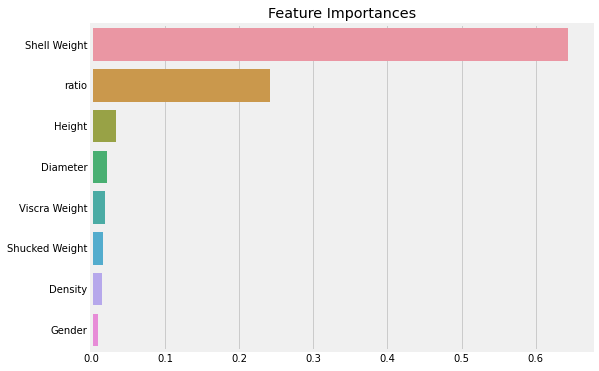

In [4523]:
#feature 중요도 비교

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

ftr_importances_values = model_final.feature_importances_
ftr_importances = pd.Series(ftr_importances_values, index = X_train.columns)
ftr_top = ftr_importances.sort_values(ascending=False)[:9]

plt.figure(figsize=(8,6))
plt.title('Feature Importances')
sns.barplot(x=ftr_top, y=ftr_top.index)
plt.show()